# Dependencies and Set up

In [20]:
#Dependencies and read data
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

mouse_file = pd.read_csv('data/Mouse_metadata.csv')
study_file = pd.read_csv('data/Study_results.csv')

# Combine the data into a single dataset
merge_df = pd.merge(mouse_file, study_file, how='outer',on='Mouse ID')
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


# Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
new_df = merge_df[['Drug Regimen','Tumor Volume (mm3)']]
summary_df = new_df.groupby(['Drug Regimen']).mean()
summary_df['Mean']= new_df.groupby(['Drug Regimen']).mean()
summary_df['Median']= new_df.groupby(['Drug Regimen']).median()
summary_df['Variance']= new_df.groupby(['Drug Regimen']).var()
summary_df['Standard Deviation']= new_df.groupby(['Drug Regimen']).std()
summary_df['SEM']= new_df.groupby(['Drug Regimen']).sem()
summary_df = summary_df.drop(columns='Tumor Volume (mm3)')
summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar Plots

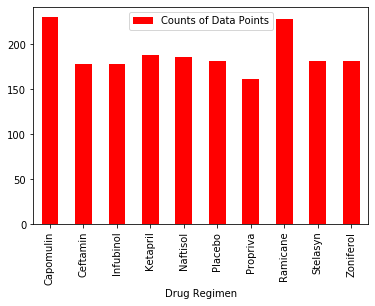

In [22]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# bar_summary = summary_df.plot(kind = 'bar',figsize=(10,5),grid=True)
# bar_summary.set_ylabel("Statistics")
# bar_summary
data_regimen_df = merge_df.copy()
new_data_regimen_df = data_regimen_df[['Drug Regimen','Tumor Volume (mm3)']].groupby(['Drug Regimen']).count()
rename_df = new_data_regimen_df.rename(columns={'Tumor Volume (mm3)':'Counts of Data Points'})
rename_df.plot.bar(color='r',align='center')

Text(0, 0.5, '# of Data Points')

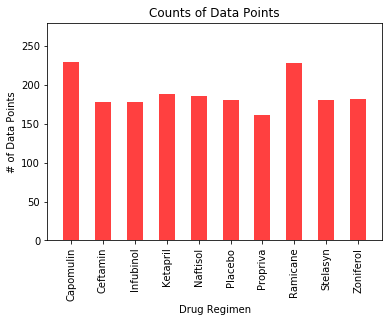

In [23]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
count_reindex_df = rename_df.reset_index()
#count_reindex_df
drug_len = np.arange(len(count_reindex_df['Drug Regimen']))
plt.bar(drug_len,count_reindex_df['Counts of Data Points'], color='r', alpha=0.75, align="center",width = 0.5)
tick_locations = [value for value in drug_len]
plt.xticks(tick_locations, count_reindex_df['Drug Regimen'])
plt.xlim(-0.75, len(drug_len)-0.25)
plt.ylim(0, max(count_reindex_df['Counts of Data Points'])+50)
plt.xticks(rotation=90)
plt.title("Counts of Data Points")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Data Points')

# Pie Plot

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002355BD2BC88>],
      dtype=object)

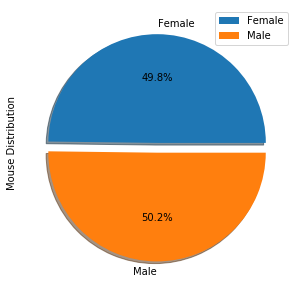

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_df = merge_df.copy()
pie_drop_df = pie_df.drop_duplicates(['Mouse ID'])
pie_grouped_df = pie_drop_df[['Mouse ID','Sex']].groupby(['Sex']).count()
pie_renamed_df = pie_grouped_df.rename(columns={'Mouse ID':'Mouse Distribution'})
pie_renamed_df.plot.pie(subplots=True,figsize =(10,5),autopct='%1.1f%%',fontsize=10,explode=[0,0.09],shadow=True)


C:\Users\Wei_l\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


Text(0.5, 1.0, 'Mouse Distribution')

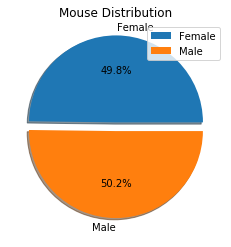

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = pie_grouped_df.index
explode = (0.1,0)
plt.pie(pie_grouped_df, explode=explode, labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.legend()
plt.title('Mouse Distribution')

# Quartiles, outliers and boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
#our of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
#merge_max_df = merge_df[['Drug Regimen','Timepoint','Tumor Volume (mm3)']].groupby(['Drug Regimen']).max().sort_values(['Tumor Volume (mm3)'],ascending=False)
best_regimen_df = merge_df[merge_df['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
best_sorted_df = best_regimen_df[['Mouse ID','Drug Regimen','Timepoint','Tumor Volume (mm3)']].sort_values(['Timepoint'])
best_grouped_df = best_sorted_df.groupby(['Mouse ID','Drug Regimen']).last()['Tumor Volume (mm3)'].to_frame().reset_index()
best_grouped_df

quartiles = best_grouped_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")





The lower quartile of Tumor Volume (mm3) is: 37.187743802499995
The upper quartile of Tumor Volume (mm3) is: 59.930261755000004
The interquartile range of Tumor Volume (mm3) is: 22.74251795250001
The the median of Tumor Volume (mm3) is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


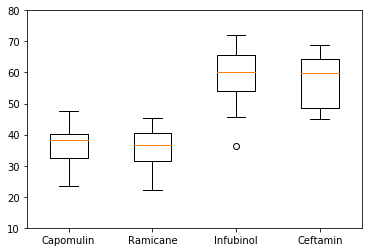

In [27]:
#Generate a box plot of the final tumor volume of each mouse across four regimens of interest
top_regimen = ['Capomulin','Ramicane','Infubinol','Ceftamin']

tumor_lists = best_grouped_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_regimen)
tumor_volumes = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_volumes, labels=top_regimen)
plt.ylim(10, 80)
plt.show()

# Line and scatter plots

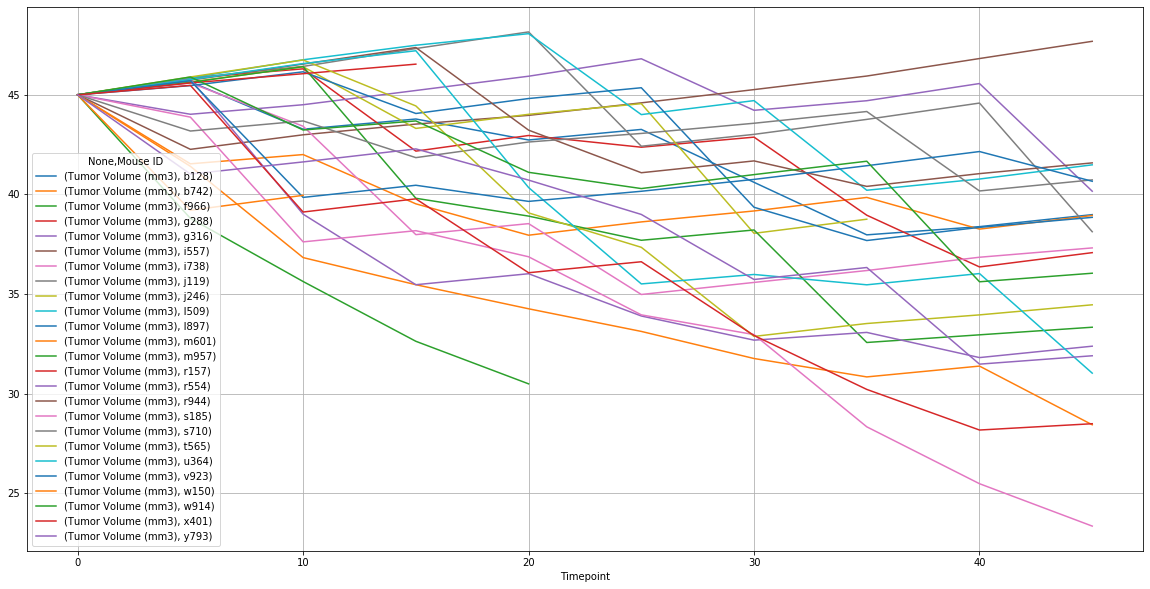

In [28]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capo_regimen_df = merge_df.loc[merge_df['Drug Regimen']=='Capomulin',:]
new_capo= capo_regimen_df[['Mouse ID','Timepoint','Tumor Volume (mm3)']].pivot(index='Timepoint',columns='Mouse ID')
new_capo.plot.line(figsize=(20,10),grid = True)



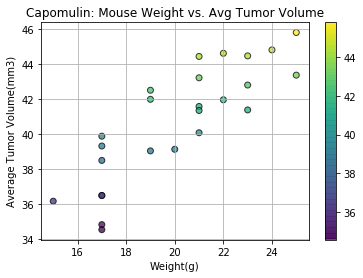

In [29]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
weight_tumor_df = capo_regimen_df[['Mouse ID','Weight (g)','Tumor Volume (mm3)']].groupby(['Mouse ID','Weight (g)']).mean()
nn_df = weight_tumor_df.reset_index().rename(columns={'Tumor Volume (mm3)':'Average Tumor Volume(mm3)','Weight (g)':'Weight(g)'})
plt.scatter(nn_df['Weight(g)'],nn_df['Average Tumor Volume(mm3)'],marker='o',c=nn_df['Average Tumor Volume(mm3)'],edgecolors='black',alpha=0.75)
plt.xlabel("Weight(g)")
plt.ylabel("Average Tumor Volume(mm3)")
plt.title('Capomulin: Mouse Weight vs. Avg Tumor Volume')
plt.grid()
clb = plt.colorbar()
plt.show()



The correlation between both factors is 0.84
The r-squared is: 0.7088568047708717


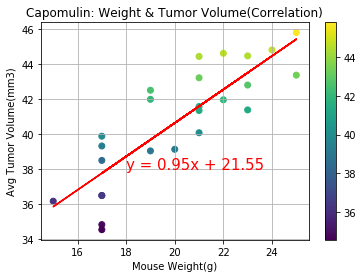

In [30]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
weight_g = nn_df['Weight(g)']
avg_tumor = nn_df['Average Tumor Volume(mm3)']
correlation = st.pearsonr(weight_g,avg_tumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight_g, avg_tumor)
regress_values = weight_g * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight_g,avg_tumor,c=avg_tumor)
plt.plot(weight_g,regress_values,"r-")
plt.annotate(line_eq,(18,38),fontsize=15,color="red")
plt.xlabel('Mouse Weight(g)')
plt.ylabel('Avg Tumor Volume(mm3)')
plt.title('Capomulin: Weight & Tumor Volume(Correlation)')
print(f"The r-squared is: {rvalue**2}")
clb = plt.colorbar()
plt.grid()
plt.show()